https://www.coursera.org/learn/probabilistic-graphical-models-3-learning/home/week/1

Probabilistic-Graphical Models - Learning - Week1

> 스터디는 계속 진행중이나, 벌여놓은 것들이 많아 자료까지 만들 여유가 없는 상황입니다. 
앞쪽에 정리하지 못한 것들(Course1 Week3 ~ Course2)은 나중에 시간이 나면.. 적어보도록 하겠습니다.

> 이번주 내용은 Learning 파트의 첫번째 내용으로서 text에서는 17장의 내용입니다.

(Overview 는 생략합니다.)

# [1] Prameter Estimation in Bayesian Networks

## [1-1] Maximum Likelihood Parameter Estimation in BNs

### <font color='red'>[1-1-1] MLE(Maximum Likelihood Estimation)</font>

우선 모수 추정(Parameter Estimation)의 가장 기본이라 할 수 있는 최대우도추정법(MLE, Maximum Likelihood Estimation)에 대해 알아보자.

간단한 예로 Biased coin(앞면이 튀어 나와 있다거나 뭐 그런)을 던지는 상황(시행)을 생각해 보자. 이런 동전을 한번 던지는 상황은 Bernolli trial이라 할 수 있고 시행의 결과는 앞면이나거 뒷면일텐데, 이를 확률 분포로 표현하면 아래와 같다.

$$P(X=1) = \theta, P(X=0) = 1-\theta$$

즉 이 이상한? 동전은 앞면($X=1$)이 나올 확률이 $\theta$이고, 뒷면($X=0$)이 나올 확률이 $1-\theta$이다.

만약 이 동전을 $M$던진다면 $M$개의 시행 결과(앞면들, 뒷면들)얻게 될 것이다. 또한 각 시행은 IID(Independent and Identically distributed)을 가정한다.(각 시행의 결과가 다른 시행에 영향을 주지 않고(Independent) 항상 같은 동전(Identical distribution)을 던짐). 이 데이터를 아래와 같이 $\mathcal{D}$로 표현할 수 있다.

$$\mathcal{D} = \{x[1], \dots, x[M]  \}$$

우리가 이 상황에서 하려는 것은 데이터($\mathcal{D}$)를 통해 모수($\theta$) 값이 얼마인지 알아내는 것이다. 즉 여러번 동전 던지기 결과를 통해 이 동전의 앞면 혹은 뒷면이 얼마나 튀어 나와 있는지 알고 싶은 것이다.

<img  src="./_images/521_1.PNG"/>

앞서 동전 던지는 상황을 PGM(Probabilistic Graphical Model) 관점에서 접근해보면 아래와 같은 그림으로 생각해볼 수 있다. 아래 왼쪽 그림은 Plate Model로 그린 것이고, 아래 우측 그림은 Ground model로 그린 것이다. 즉 각 시행의 결과($X_i$)가 $\theta$에 영향을 받는데, ($\theta$가 주어지면) 각 시행의 결과는 서로 영향을 주지는 않는다. 

$\theta$가 주어졌을 때 각 시행이 독립이라는 것이 조금 혼란스러울 수도 있는데...  만약 $\theta$값이 예를들어 0.3이라는 사실을 알고 있다면 매 시행에서 동전의 앞면이 나올 확률이 0.3으로 동일하므로 각 시행은 독립이라 할 수 있다. 반면 $\theta$값을 모르는 상황이라면 처음 3번 시행에서 앞면이 2번 뒷면이 1번 나왔다면 4번째 동전을 던질 때 동전의 앞면이 나올 확률은 2/3이고, 4번째 시행의 결과에 따라 5번째 시행에서 앞면이 나올 확률은 2/4이거나 3/4가 된다. 즉 3번째 시행과 4번째 시행은 서로 독립이라 할 수 없다. 즉 각 시행은 $\theta$가 주어졌을 때 서로 독립(conditionally independent given $\theta$)이라 할 수 있다.
$$P(X_i \cap X_j ~|~ \theta) = P(X_i ~|~ \theta) ~ P(X_j ~|~ \theta) $$

<img  src="./_images/521_2.PNG"/>

앞서 동전을 던지는 상황에서 최대우도추정(MLE)을 통해 하려는 것은 데이터 $\mathcal{D}$를 가장 잘 예측(설명)하는 0과 1사이의 $\theta$를 찾는 것이다. 즉 현재 관측된 데이터가 나온 상황을 가장 잘 설명하는 $\theta$를 찾아야 하는 것이다. 예를들어 10번 압정을 던저 head가 7번 나왔다면 0.5보다 0.7이 이 상황을 보다 잘 설명하는 $\theta$라 할 수 있다. 

이런 추론 상황을 아래와 같이 수식으로 표현해 볼 수 있다. 즉 어떤 $\theta$가 주어졌을 때 현재의 데이터 $\mathcal{D}$가 나올 확률을 계산할 수 있고, 이 확률이 최대가 되는 $\theta$가 앞서 설명한 조건을 만족하는 최적의 $\theta$일 것이다.

$\theta$가 주어졌을 때 특정 sample을 얻을 확률은 $P(x[m] ~|~ \theta)$이며 각 시행은 독립이기 때문에 $M$개의 sample이 나올 확률은 $P(\mathcal{D} ~|~ \theta) = \prod_{m=1}^M P(x[m] ~|~ \theta)$이고 이것을 우도 (likelihood) $L(\theta ~:~ D)$라 한다.

예를들어 압정을 5번 던졌을 때 그 결과가 $H, T, T, H, H$라면, 이때의 우도는 아래와 같다.
$$L(\theta~|~\mathcal{D}) = \theta \cdot (1-\theta) \cdot (1-\theta) \cdot \theta \cdot \theta$$

<img  src="./_images/521_3.PNG"/>

이를 일반화 시켜서 $M_H$번의 head와 $M_T$번의 tail이 관측됐다면 이때의 우도는 아래와 같다.
$$L(\theta ~|~ M_H, M_T) = \theta^{M_H}~(1-\theta)^{M_T}$$

최대값 계산을 용이하게 하기 위해 log를 취하면 아래와 같은 log-likelihood 함수 $l(\theta ~:~ M_H, M_T)$를 얻을 수 있다.          
(log 함수의 단조증가 특성으로 인해 $L(\theta ~|~ M_H, M_T)$를 최대화 하는 $\theta$와 $l(\theta ~:~ M_H, M_T)$를 최대화 하는 $\theta$는 같다.)
$$l(\theta ~:~ M_H, M_T) = M_H log \theta ~+~ M_T log(1-\theta)$$

$\frac{dl}{d\theta} = 0$을 풀어 $l(\theta ~:~ M_H, M_T)$를 최대화 하는 $\theta$를 구할 수 있다.
$$\begin{align}
&\frac{dl}{d\theta} = \frac{M_H}{\theta} - \frac{M_T}{1-\theta} = 0\\
&\hat{\theta} = \frac{M_H}{M_H + M_T}
\end{align}$$

<img  src="./_images/521_4.PNG"/>

데이터 $\mathcal{D}=\{x_1, \cdots, x_m \}$를 이용하여 $\theta$를 추론하는데 있어          
$\mathcal{D}=\{x_1, \cdots, x_m \}$ 전부를 이용해 $\theta$를 추론하는 것과 동일하게       
어떤 축약된 정보(통계량) $T$를 이용해서도 $\theta$를 추론할 수 있다면     
$T$는 $\theta$에 대한 충분통계량(sufficient statistics)이다.

좀더 엄밀하게는 아래와 같이 정의할 수 있다.(김우철 수리통계학 p349)
> 모집단 분포가 확률밀도함수 $f(x;\theta), ~ \theta \in \Omega$ 중의 하나라고 모형을 설정한 경우에 랜덤표본 $X_1, \cdots, X_n$을 이용한 통계량 $Y=u(X_1, \cdots, X_n)$에 대하여 
$$P_{\theta_1} \left\{ {(X_1, \cdots, X_n)}^t \in A ~|~ Y=y \right\} = P_{\theta_2} \left\{ {(X_1, \cdots, X_n)}^t \in A ~|~ Y=y \right\} ~ ^{\forall} A, ~ ^{\forall} y, ^{\forall} \theta_1 \in \Omega, ~ \theta_2 \in \Omega$$일 때, (즉 $Y=u(X_1, \cdots, X_n)=y$인 조건하에서 랜덤표본 ${(X_1, \cdots X_n)}^t$의 조건부확률이 미지의 모수 $\theta \in \Omega$에 의존하지 않으면 통계량 $Y=u(X_1, \cdots, X_n)$를 $\theta \in \Omega$에 관한 충분통계량이라고 한다.

아래 슬라이드의 경우              
각 시행의 결과를 head이면 1, tail이면 0을 값으로 하는 확률변수 $X[m]$라 했을 때          
아래와 같이 $M_H$와 $M_T$가 충분통계량임을 알 수 있다.
$$\begin{align}
P_{\theta}(X[1] = x[1], \cdots , X[M] = x[M] ~|~ X[1] + \cdots + X[M] = y) &= \frac{\prod_{m=1}^M \theta^{x[m]} (1-\theta)^{1-x[m]} } {{M\choose{M_H}}\theta^{M_H} (1-\theta)^{M_T} } I_({x[1] + \cdots + x[m] = y}) \\
&={M\choose{y}}^{-1} I_({x[1] + \cdots + x[m] = y}), ^{\forall} \theta ~:~ 0 < \theta < 1  \\
\end{align}$$

<img  src="./_images/521_5.PNG"/>

보다 일반적으로           
데이터셋으로부터 $k$차원으로의 어떤 함수 $s()$가 있을 때,            
다른 두 데이터 $\mathcal{D}$와 $\mathcal{D}~'$에 대한 함수값 $s(\mathcal{D})$와 $s(\mathcal{D}~')$가 같으면 $\theta$에 대한 우도함수가 같을 경우,            
함수 $s()$는 $\theta$에 대한 충분통계량이다.         
(여기에서 $s(\mathcal{D})$는 각 data instance $x[i]$에 대한 통계량 $s(x[i])$의 합이다.)

<img  src="./_images/521_6.PNG"/>

앞서 예에서는 확률 변수 $X$가 이항 분포(binomial dist)를 갖는 경우였고     
이번에는 확률 변수 $X$가 $k$가지의 값을 갖을 수 있는 다항 분포(multimonial)인 경우를 살펴보자.

이때 우리가 구하고자 하는 것은 $k$가지 각 범주에 속할 확률 $\theta^k$인데      
$n$개의 sample로 구성된 데이터 $\mathcal{D}$가 있을 때 $\theta^k$에 대한 충분 통계량은         
각 범주가 나온 갯수인 $<M_1, \cdots, M_k>$ 이다.
$$s(\mathcal{D}) = \sum_i^n s(x^i), ~ s[x^i] = (0, \cdots, 1, \cdots, 0)$$

<img  src="./_images/521_7.PNG"/>

다음으로 정규 분포의 평균($\mu$)과 분산($\sigma^2$)을 추론하기 위한 충분 통계량 $s(\mathcal{D})$는 $<\sum_m x[m]^2,~ \sum_m x[m],~ m>$ 이다.

<img  src="./_images/521_8.PNG"/>

- 다양분포에서 $\theta_i$에 대한 최대우도추정량은 아래와 같다.         
제약조건 $\sum_k \theta_k = 1$를 만족시키면서 $L(\theta:\mathcal{D}) = \prod_k \theta_k^{M[k]}$를 최대화 하는 $\theta$를 구하기 위해 lagrange 방정식을 풀면 아래와 같다.
$$\begin{align}
&f(\theta_1, \cdots, \theta_k) = \mathrm{log}~ L(\theta : \mathcal{D}) = \sum_k M[k] ~ \mathrm{log} \theta_k \\
&g(\theta_1, \cdots, \theta_k) = \sum_k \theta_k \\
\\
&\nabla f = \frac{\partial f(\theta_1, \cdots, \theta_k)}{\theta_i} = \frac{M[i]}{\theta_i} \\
&\nabla g = \frac{\partial g(\theta_1, \cdots, \theta_k)}{\theta_i} = 1
\\
&\nabla f = \lambda \nabla g, ~~ \frac{M[i]}{\theta_k} = \lambda, ~~ \theta_i = \frac{M[i]}{\lambda} \\
&\because \sum_i^k \theta_i = \frac{M[1]}{\lambda} + \cdots \frac{M[k]}{\lambda} = \frac{M}{\lambda} = 1 \\
&\therefore \theta_i = \frac{M[i]}{M}
\end{align}$$


- 정규분포에서 평균과 분산에 대한 최대우도추정량은 아래와 같다.
$$\begin{align}
&L(\mathcal{D} : \mu, \sigma) = \prod_m \frac{1}{\sqrt{2 \pi}\sigma} \mathrm{exp}\left\{ -\frac{{(x[m] - \mu)}^2}{2\sigma^2} \right\}\\
&\frac{\partial ~ \mathrm{log} L(\mathcal{D} : \mu, \sigma)}{\partial ~ \mu} = 0, ~~ \hat{\mu} = \frac{1}{M} \sum_m x[m]\\
&\frac{\partial ~ \mathrm{log} L(\mathcal{D} : \mu, \sigma)}{\partial ~ \sigma} = 0, ~~ \hat{\sigma} = \sqrt{\frac{1}{M} \sum_m (x[m] - \hat{\mu})^2}
\end{align}$$

<img  src="./_images/521_9.PNG"/>

- 주어진 데이터에 대한 모수 추정에 MLE가 단순하고 효과적임
- 충분 통계량은 단일 최대우도 함수를 결정함(충분통계량의 정의)
- 일반적인 많은 분포의 모수에 대한 최대우도 추정량이 알려져 있음.(앞서 가우시안 처럼..)

<img  src="./_images/521_10.PNG"/>

### <font color='red'>[1-1-2] MLE for BNs</font>

앞서 단일 변수에 대한 최대우도 추정에 대해 살펴봤다.    
이번에는 다 변수에 대한, 특히 다변수가 Bayesian network 구조로 주어지는 경우의 최대우도추정에 대해 알아보겠다.

<img  src="./_images/522_1.PNG"/>

아래와 같이 $X$와 $Y$로 이뤄진 단순한 Bayesian network가 주어졌을 때,    
우리가 추론하고자 하는 parameter는 아래 두개이고, 
- $X$의 분포를 결정하는 parameter인 $\theta_X$
- $Y$의 분포를 결정하는 parameter인 $\theta_{Y|X}$       
만약 $X$와 $Y$가 모두 이항변수라면          
$\theta_X$는 2x1 CPD를, $\theta_{Y|X}$는 2x2 CPD를 떠올리면 된다.

이런 변수간의 관계구조가 주어졌을 때, 두 변수에 대한 데이터쌍 m개를 관측했다면     
이때의 likelihood를 구해볼 수 있고,     
이는 두개의 local likelihood의 곱으로 분해된다.

<img  src="./_images/522_2.PNG"/>

앞서 우도함수가 두개의 local likelihood의 곱으로 분해 되었는데,   
이를 보다 일반적으로 아래와 같이 표현할 수 있다.

아래 첫번째 식에서 두번째 식으로 전개는 bayesian net chain rule에 의한 것이고    
두번째에서 세번째로는 단순히 곱의 순서를 바꿨고   
결국 local likelihood $L_i(\Theta_i : \mathcal{D})$ 들의 곱으로 바뀐다.

즉 우리가 추론하려는 $\theta_{X_i ~|~ u_i}$들이 서로 disjoint하다면(각 CPD의 parent가 주어졌을 때, 이들이 서로 다른 변수 집합에 관한 함수 일 때), 각 CPD의 최대우도추정량들이 바로 전체 네트워크의 최대우도추정량이 된다.(global decomposability)

<img  src="./_images/522_3.PNG"/>

CPD가 Table 형태로 주어지는 경우 likelihood 분해를 좀 더 진행할 수 있다.     
이산형 변수들 $\mathbf{U}$가 부모 노드로서 이산형 변수 $X$에 영향을 주는 관계가 있다면    
$X|\mathbf{U}$의 확률 분포는 parameter $\theta_{x|\mathbf{u}}$가 결정하며      
이때 $x|\mathbf{U}$에 대한 관측값이 $M$개 있다면           
이에 대한 local likelihood는 아래와 같다. ($\theta_{x|\mathbf{u}}$가 주어졌을 때 $M$개 sample이 나올 확률의 곱)
$$\prod_{m=1}^M P(x[m] ~|~ \mathbf{u}[m] : \theta_{x|\mathbf{u}})$$

예를들어 $U$라는 주머니에 동전이 하나 있고, $X$라는 테이블 위에 두개의 공평하지 않은 동전(동전1, 동전2)이 놓여 있다. 우선 주머니 $U$에서 동전을 집어 앞면이 나오면 동전1을 던저 앞면이 나오는지 뒷면이 나오는지 기록한다. 반면 주머니 $U$에서 뽑아 던진 동전이 뒷면이 나오면 테이블에서 동전2를 던저 앞면이 나오는지 뒷면이 나오는지 기록한다. 예를들어 아래와 같은 CPD를 생각해볼 수 있다. 여기에서 한가지 관심있게 살펴볼 부분은 부모 노드의 값에 따라 $\theta_{x|u}$는 $\theta_{Xx|u^H}$와 $\theta_{x|u^T}$로 나뉘며, $\sum_x \theta_{x|u^H} = 1, \sum_x \theta_{x|u^ㅆ} = 1$라는 점 이다.

$$\begin{array}{rr}
\hline
 & x^H & x^T \\ 
\hline
u^H & 0.4 & 0.6 \\ 
\hline
u^T & 0.2 & 0.8 \\
\hline
\end{array}$$

만약 $[u, x]$ 쌍으로 아래와 같은 데이터가 관측되었다면       
- sample 1: $x^H$, $u^T$
- sample 2: $x^H$, $u^H$
- sample 3: $x^T$, $u^T$
- sample 4: $x^T$, $u^T$
- sample 5: $x^H$, $u^H$
- sample 6: $x^H$, $u^T$
- sample 7: $x^T$, $u^T$
- sample 8: $x^H$, $u^T$
- sample 9: $x^T$, $u^H$
- sample10: $x^T$, $u^T$      
(HH 쌍이 2개,  TH 쌍이 1개, HT쌍이 3개, TT쌍이 4개 이다.)   

이때의 likelihood는 아래와 같다.
$$\begin{align}
\prod_{m=1}^M P(x[m] ~|~ \mathbf{u}[m] : \theta_{x|\mathbf{u}}) &= P(x^H|u^T) P(x^H|u^H) \cdots P(x^T|u^T) \\
&= P(x^H|u^H)^2 \cdot P(x^T|u^H)^1 \cdot P(x^H|u^T)^3 \cdot P(x^T|u^T)^4 \\
&= \theta_{x^H|u^H}^2 \cdot \theta_{x^T|u^H}^1 \cdot \theta_{x^H|u^T}^3 \cdot \theta_{x^T|u^T}^4 \\
&= \theta_{x^H|u^H}^2 \cdot {(1 - \theta_{x^H|u^H})}^1 \cdot \theta_{x^H|u^T}^3 \cdot {(1 - \theta_{x^H|u^T})}^4 \\
\end{align}$$
결국 CPD의 각 cell에 해당하는 sample이 나오는 확률들을 곱한 것인데,     
log likelihood 함수를 최대화 하는 $\theta$를 구해보면 $\theta_{x|u} = \frac{M[x, u]}{M[u]}$라는 것을 알 수 있다.     
앞서 예에서는 아래와 같이 최대우도추정치를 구할 수 있다.
$$\theta_{x^H|u^H} = \frac{M[x^H, u^H]}{M[x^H, u^H] + M[x^T, u^H]}= \frac{2}{2+1}\\
\theta_{x^T|u^H} = \frac{M[x^T, u^H]}{M[x^H, u^H] + M[x^T, u^H]}= \frac{1}{2+1}\\
\theta_{x^H|u^T} = \frac{M[x^H, u^T]}{M[x^H, u^T] + M[x^T, u^T]}= \frac{3}{3+4}\\
\theta_{x^T|u^T} = \frac{M[x^T, u^T]}{M[x^H, u^T] + M[x^T, u^T]}= \frac{4}{3+4}\\
$$

<img  src="./_images/522_4.PNG"/>

앞서 다뤘던 내용에서는 각 변수의 분포를 결정하는 parameter가 독립적으로 존재하는 경우이고 이번에는 하나의 parameter가 다수의 변수에 공통적으로 작용하는 'shared parameter'를 살펴보자. 다양한 방식으로 shared parameter가 사용될 수 있지만, 이번 논의에서는 HMM(Hidden Markov Model)을 중심으로 살펴본다.

Text의 Chapter 6 혹은 강의 Representation - week2에서 다뤘다시피    
각 시점의 상태가 이전 시점의 상태에 영향을 받는데, 이 과정은 이전 상태에 따른 다음 상태의 확률 분포를 나타내는  공통의 parameter $\theta_{s'|s}$에 의해 결정된다.

예를들어 $S$가 이항 변수라 가정하면 상태 전이의 경우는 1에서 1로, 1에서 0으로, 0에서 1로, 0에서 0으로의 4가지이고, 각 전이 확률에 따라 상태 전이가 결정되고, 이 4가지 전이 확률을 각각 $\hat{\theta}_{s^1 \to s^1}$, $\hat{\theta}_{s^1 \to s^0}$, $\hat{\theta}_{s^0 \to s^1}$, $\hat{\theta}_{s^0 \to s^0}$로 표기할 수 있다.

시점 $t=1$에서부터 시점 $t=T$까지 어떤 데이터 sequence가 관측되었다면        
 
전이 확률 벡터$\theta$가 주어졌을 때 전체 데이터가 관측될 확률(likelihood)는 (Markov 가정에 의해) 아래와 같다.
$$L(\theta:S^{(0:T)}) = \prod_{t=1}^T P(S^{(t)} ~|~ S^{(t-1)} : \theta)$$
그런데 위 확률 곱은 각 전이 경우들의 곱 끼리 묶을 수 있어서 아래와 같이 표현할 수 있다.    
($s^1 \to s^1$끼리, $s^1 \to s^0$끼리, $s^0 \to s^1$끼리, $s^0 \to s^0$끼리, 그리고 마지막으로 끼리 끼리 곱한 것들의 곱)

예를들어 $S$가 이항 변수라 가정하고 관측 데이터가 아래와 같다면
$$0 \to 1 \to 1 \to 0 \to 1 \to 1 \to 0 \to 0 \to 1 \to 1$$
$M[S^1 \to S^1] = 3$, $M[S^1 \to S^0] = 2$, $M[S^0 \to S^1] = 3$, $M[S^0 \to S^0] = 1$


$$\begin{align}
L(\theta:S^{(0:T)}) &= \prod_{t=1}^T P(S^{(t)} ~|~ S^{(t-1)} : \theta) \\
&= \theta_{s^1 \to s^1}^3 \cdot \theta_{s^1 \to s^0}^2 \cdot \theta_{s^0 \to s^1}^3 \cdot \theta_{s^0 \to s^0}^1
\end{align}$$

이런 이산 전이 모형에서 $\theta_{s^i \to s^j}$에 대한 최대 우도 추정량은 아래와 같다.
$$\hat{\theta}_{s^i \to s^j} = \frac{M[s^i \to s^j]}{M[s^i]}$$

즉 위 예에서 $\hat{\theta}_{s^1 \to s^0}$은 $\frac{2}{3+2}$이다. (이전 시점의 상태값에 해당하는 경우들이   given condition으로서 모두 더해져 분모가 된다.)

<img  src="./_images/522_5.PNG"/>

앞서 모형에서는 hidden state($S^{(t)}$)이 그대로 관측되는 상황을 가정 했다면, 이번에는 hidden state($S^{(t)}$)의 영향 받은 (꼭 hidden state과 같지 않아도 되는) $O^{(t)}$가 관측되는 상황을 생각해보면, 관측 데이터에서 transition model $P(X' | X)$과 observation model $P(O|X)$에 해당하는 확률들을 곱하여 아래와 같이 likelihood를 구할 수 있다.    
(State-Observation Model에 대해서는 text의 6.2.3을 참고 바람) 

<img  src="./_images/522_6.PNG"/>

<img  src="./_images/522_7.PNG"/>

Table CPD에서 관측데이터에 비해 bucket 수가 커질 수록, 관측값이 없는 그 수가 상대적으로 적은 bucket이 늘어날 수밖에 없다. 즉 거의 관측되지 않는 조합이 있다는 것이다. 이런 경우 그 조합의 확률을 잘 추정하기 어려워질 것이다.     
bucket이 늘어나는 상황은 추정하려는 node의 부모 node가 많아지는 경우인데, 그래프 구조가 복잡해 질수록 이런 상황이 빈번해질 수 있다. 따라서 가능한 단순한 그래프 구조를 선택하는 것이 모형 일반화를 위해 좋다.

<img  src="./_images/522_8.PNG"/>

.

## [1-2] Bayesian Parameter Estimation for BNs

### <font color='red'>[1-2-1] Bayesian Estimation</font>

앞서 최대우도추정(MLE)에 대해 알아봤었다. 그런데 MLE가 간단하고 유용하기는 하지만 몇가지 문제점이 있다. 예를들어 10번의 경기에서 7번 이긴 경우 MLE를 이용한 이 팀의 승률을 추론하면 0.7을 얻는다. 그런데 동전을 10번 던저 7번 앞면이 나왔다면 동전의 앞면이 나올 확률에 대한 MLE 추정치는 0.7이지만, 우리는 우연히도 앞면이 두번 더 나왔지 않나? 하는 의심을 할 수 있다. 이러한 의심은 동전이 거의 절반의 확률로 앞면이 나온다는 과거의 경험 혹은 인식에 의한 것이다. 그런데 다시 동전을 10000번 던저 동전의 앞면이 7000번 나온 경우에도 MLE 추정치는 0.7이지만 이 경우 공평한 동전이 아니다라는 확신을 갖게 된다.       

이렇게 상황에 따라 MLE 추정치의 정확도를 의심할 수 밖에 없는 상황들이 생기는 이유는 MLE를 이용해서는 이전의 선험 지식을 추론에 반영하거나 선험 지식 대비 관측 데이터의 강도등을 반영할 수 없기 때문이다.

<img  src="./_images/523_1.PNG"/>

MLE에서는 가장 그럴듯한 $\theta$(동전의 앞이 나올 확률)을 찾는 것이 목표라면    
베이지안 접근법에서는 $\theta$를 하나의 확률 변수로 간주한다. 즉 $\theta$에 대한 확률분포가 존재하는 것이다.

$\theta$를 확률변수로 간줗한다면 동전 던지기의 결과들 $X[m]$과 $\theta$와의 관계를 아래와 같은 Bayesian network로 나타낼 수 있다.(좌측은 plate model, 우측은 ground model) 

이 경우 $\theta$가 $X[1], \cdots, X[M]$에 각각 영향을 주는 common cause 구조(text p71 참고)로서, $\theta$가 주어지면 $X[1], \cdots, X[M]$들은 서로 독립인 관계이다. 직관적으로 생각하여 $\theta$를 모를 때에는 동전을 던질 때마다 $\theta$에 대한 추가적인 정보를 얻게 되고, 참이라 생각하는 $\theta$의 확률 분포가 변하게 된다. 반면 $\theta$가 주어지면 동전을 추가로 던지는 것이 $\theta$를 추론하는데 추가적인 정보를 주지 않는다.(이미 $\theta$를 주어져 있으므로)

<img  src="./_images/523_2.PNG"/>

각 변수의 확률분포에 대한 추론을 위해 우선 전체 네트워크에 대한 결합확률분포를 생각해보면 (chain rule of BNs에 의해) 아래와 같다.
$$P(x[1], \cdots, x[M], \theta) = P(x[1], \cdots, x[M] ~|~ \theta) ~ P(\theta)$$
그런데 이는 $\theta$가 주어졌을 때 $x[1], \cdots, x[M]$들을 서로 독립이므로 아래와 같이 바꿔 쓸 수 있다.
$$P(\theta) ~ \prod_{i=1}^M P(x[i] ~|~ \theta)$$
또한 $M$개의 관측 데이터에서 앞면이 나온 수와 뒷면이 나온 수를 이용하면 위 식은 아래와 같이 바뀐다.
$$P(\theta) ~ \theta^{M_H} ~ (1-\theta)^{M_T}$$

다음으로 Bayes rule을 이용해 $\theta$에 대한 사후 분포를 생각해볼 수 있다.
$$P(\theta ~|~ x[1], \cdots, x[M]) = \frac{P(x[1], \cdots, x[M] ~|~ \theta) ~ P(\theta)}{P(x[1], \cdots, x[M])}$$
위 식에서 $P(\theta ~|~ x[1], \cdots, x[M])$는 $\theta$에 대한 사후분포(posterior probability distribution of $\theta$)이고, 분자의 $P(x[1], \cdots, x[M] ~|~ \theta)$는 MLE에서도 봤던 likelihood 항이다. 동전 던지기 예에서는 $\theta^{M_H} ~ (1-\theta)^{M_T}$로 계산 되었다. 분자의 두번째 항인 $P(\theta)$는 $\theta$에 대한 사전분포(prior probability distribution of $\theta$)인데 사전 정보가 없다면 균등분포(uniform)을 사용하거나 정보에 따른 다양한 분포를 사용할 수 있다. 분모의 $P(x[1], \cdots, x[M])$는 정규화상수(normalizing constant)로서 아래와 같이 '데이터와 파라미터'의 결합분포에서 '파라미터'를 integrating out 하여 구할 수 있다.
$$\begin{align}
P(x[1], \cdots, x[M]) &= P(\mathcal{D})\\
&= \int_{\theta} P(\mathcal{D}, \theta) ~ d\theta \\
&= \int_{\theta} P(\mathcal{D} ~|~ \theta) ~ P(\theta) ~ d\theta
\end{align}$$

<img  src="./_images/523_3.PNG"/>

> Dirichlet distribution을 다루기 전에 몇가지 사전 지식을 짚고 넘어가자.
- 감마함수
- 감마분포
- 베타함수
- 베타분포

######  감마함수
감마함수(Gamma function)는 아래와 같이 정의되고,
$$\Gamma(\alpha) = \int^{+\infty}_0 x^{\alpha-1} ~ e^{-x} ~ dx, ~ \alpha > 0$$
아래와 같은 성질을 갖는다.
$$\begin{align}
\Gamma(1) &= 1 \\
\Gamma(x+1) &= x \Gamma(x) \\
\Gamma(n+1) &= n!, ~ n \in \mathbb{Z}
\end{align}$$

###### 감마분포
감마분포를 따르는 확률변수 $X \sim \mathrm{Gamma}(\alpha, \beta)$의 확률밀도함수는 아래와 같다.
$$pdf_X(x) = \frac{1}{\Gamma(\alpha) \beta^{\alpha}}x^{\alpha - 1} ~ e^{-x/\beta} ~ \mathrm{I}_{(x>0)}, (\alpha > 0, \beta > 0)$$  

이때 $\alpha$를 형상모수(shape parameter)라 하고, $\beta$를 척도모수(scale parameter)라 한다.    
또한 $X$의 기대값 $E(X)$은 $\alpha \beta$이고 분산 $Var(X)$은 $\alpha \beta^2$이다.

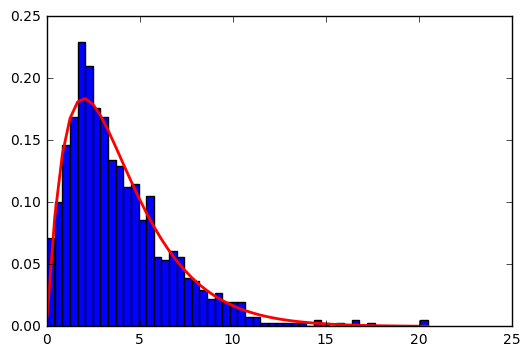

In [1]:
import numpy as np
shape, scale = 2., 2. # mean=4, std=2*sqrt(2)
s = np.random.gamma(shape, scale, 1000)

import matplotlib.pyplot as plt
import scipy.special as sps
count, bins, ignored = plt.hist(s, 50, normed=True)
y = bins**(shape-1) * (np.exp(-bins/scale) / (sps.gamma(shape) * scale**shape))
plt.plot(bins, y, linewidth=2, color='r')
plt.show()

###### 베타함수
감마함수를 조합하여 아래와 같은 베타함수 $B(\alpha_1, \alpha_2)$를 정의할 수 있다.
$$\begin{align}
B(\alpha_1, \alpha_2) &= \frac{\Gamma(\alpha_1) \Gamma(\alpha_2)}{\Gamma(\alpha_1 + \alpha_2)}\\
&= \int^1_0 x^{\alpha_1 - 1} (1-x)^{\alpha_2 - 1} dx\\
\end{align}$$

###### 베타분포
베타분포는 아래와 같이 정의 된다.
$$\begin{align} 
X \sim \mathrm{Beta}(\alpha_1, \alpha_2) &\Leftrightarrow X \,{\buildrel d \over \equiv}\, \frac{Z_1}{Z_1 + Z_2}, ~ Z_1 \sim \mathrm{Gamma}(\alpha_1, \beta), Z_2 \sim \mathrm{Gamma}(\alpha_2, \beta), ~ Z_1~ \mathrm{and} ~ Z_2~ \mathrm{are~ mutually~ independent} \\
&\Leftrightarrow pdf_X(x) = \frac{1}{B(\alpha_1, \alpha_2)} x^{\alpha_1 - 1} (1-x)^{\alpha_2 - 1} ~ I_{(0, 1)}(x)
\end{align}$$

이때 평균과 분산은 아래와 같다.
$$\begin{align}
E[X] &= \frac{\alpha_1}{\alpha_1 + \alpha_2} \\
Var[X] &= \frac{\alpha_1 \alpha_2}{(\alpha_1 + \alpha_2)^2 ~ (\alpha_1 + \alpha_2 + 1)} \\
\end{align}
$$

###### 디리슈레 분포
베타분포가 압정의 머리가 $\alpha_1$번 꼬리가 $\alpha_2$번 나오는 이항 시행을 모형화 한다면          
디리슈레분포는 서로 다른 비율로 각 면이 나올 수 있는 주사위를 던지는 것과 같이 다항 시행을 모형화한 것이다.

> 아래 조건을 만족시키는 확률변수 $\mathbf{Y}=[Y_1, \cdots, Y_k]^t$에 대하여            
- $Y_i \geq 0$ for $i=1, \cdots, k$ 
- $\sum^k_{i=1}Y_i = 1$          

> 디리슈레분포를 다음과 같이 정의할 수 있다.

> $$\begin{align}
\mathbf{Y} = [Y_1, \cdots, Y_k]^t &\sim \mathrm{Dirichlet}(\alpha_1, \cdots, \alpha_k) \\
\Leftrightarrow &pdf_{Y_1, \cdots, Y_k}(y_1, \cdots, y_k) \\
& =\frac{\Gamma(\alpha_1 + \cdots + \alpha_k)}{\prod^k_{i=1} \Gamma(\alpha_i)} \prod^k_{i=1} q_i^{\alpha_i - 1}
~\\
~\\
E[Y_i] &= \frac{\alpha_i}{\alpha_0}, ~ \alpha_0 = \alpha_1 + \cdots + \alpha_k \\
Var[Y_i] &= \frac{\alpha_i (\alpha_0 - \alpha_i)}{{\alpha_0}^2 (\alpha_0 + 1)}
\end{align}$$



디리슈레 분포는 결국 $k$개의 hyperparameter $\alpha_1, \cdots, \alpha_k$에 의해 결정되며       
이 분포가 사전 분포로 사용되었다면 이는 $k$개의 범주에 대하여 각각 $\alpha_1, \cdots, \alpha_k$개의 사전 관측이 있었다는 것으로 해석할 수 있다.

예를들어 불공평한 (6면) 주사위를 던지는데, 과거의 경험에 의하면 주사위 각 면이 4, 2, 6, 4, 3, 7 번 나왔다면 정보가 있다면 $\theta$의 사전분포로 $\mathrm{Dirichlet}(4, 2, 6, 4, 3, 7)$를 사용하는 것이 합당하다는 것이다. 각 면이 나올 확률을 $\theta_1, \theta_2, \theta_3, \theta_4, \theta_5, \theta_6$이라 하면 $\theta$의 사전분포는 아래와 같다.

$$\begin{align}
P(\theta) &= \frac{1}{Z} {\theta_1}^4 \cdot {\theta_2}^2 \cdot {\theta_3}^6 \cdot {\theta_4}^4 \cdot {\theta_5}^3 \cdot {\theta_6}^7, ~~ \frac{1}{Z} = \frac{\Gamma(4+2+6+4+3+7)}{\Gamma(4)\Gamma(2)\Gamma(6)\Gamma(4)\Gamma(3)\Gamma(7)}  \\
&= \frac{1}{Z} \prod_{i=1}^6 {\theta_i}^{\alpha_i - 1}\\
\end{align}$$

<img  src="./_images/523_4.PNG"/>

hyperparameter가 두개만 사용되는 디리슈레분포는 사실 베타분포와 동일하다.    
$$\mathrm{Dirichlet}(\alpha_1, \alpha_2) \equiv \mathrm{Beta}(\alpha_1, \alpha_2)$$

또한 아래 그림에서 볼 수 있는 것과 같이 $\mathrm{Dirichlet}(1, 1)$은 균등분포(uniform)와 동일하다.

<img  src="./_images/523_5.PNG"/>

어떤 사전 분포가 주어지고, 데이터를 관측하고, 사후 분포를 만들고      
앞서 만든 사후 분포를 사전 분포로 이용하고, 데이터를 관측하고, 사후 분포를 만들고     
앞서 만든 사후 분포를 사전 분포로 이용하고, 데이터를 관측하고, 사후 분포를 만들고     
...         
이런식으로 현재시점까지 취합된 정보를 이후 추론을 위해 사용할 수 있기 위해서는, 정보 취합 과정의 결과물이라 할 수 있는 사후 분포가 다루기 쉬운 분포라면 좋을 것이다. 특히 사전 분포와 사후 분포가 동일한 분포족(distribution family)에 속한다면 그 계산이 매우 간단해 지는데, 이런 경우의 사전분포를 공액사전분포(conjugate prior)라 한다.

강의에서 소개하는 공액사전분포는 아래의 디리슈레분포이고
> 표본분포가 다항분포 $X = (X_1, X_2, \cdots, X_k)^t \sim \mathrm{Multi}(n, (\theta_1, \theta_2, \cdots, \theta_k)^t$ 이고,     
  $n$건의 데이터에 k개의 범주가 각각 $M_1, M_2, \cdots, M_k$건식 관측되었을 때,       
  사전분포가 디리슈레 분포 $\theta \sim \mathrm{Dirichlet}(\alpha_1, \alpha_2, \cdots, \alpha_k)$이면           
  사후분포는 디리슈레 분포 $\theta~|~\mathcal{D} \sim \mathrm{Dirichlet}(\alpha_1 + M_1, \alpha_2 + M_2, \cdots, \alpha_k + M_k)$이다.
  
이 외에도 표본분포가 포아송 분포 일때 감마사전분포, 표본분포가 이항분포일때 베타 사전분포 등 다양한 공액 사전분포가 존재한다.

<img  src="./_images/523_6.PNG"/>

공액사전분포(conjugate prior)를 사용하는 경우 관측데이터의 충분통계량만을 이용하여 사후분포를 아주 쉽게 구할 수 있는 장점이 있다.

<img  src="./_images/523_7.PNG"/>

### <font color='red'>[1-2-2] Bayesian Prediction</font>

파라미터 $\theta$에 대한 사전분포 $P(\theta)$가 주어지고 데이터 $\mathcal{D} = \{x[1], \dots, x[M]\}$를 관측한 후 파라미터 $\theta$에 대한 사후분포 $P(\theta~|~\mathcal{D})$를 만드는 과정에 대해 알아봤다. 예를들어 압정의 head가 나오는지를 표현하는 확률변수 $\theta$의 확률분포를 구하게 되는 것인다. 

그런데 $\theta$가 어떠한지 아는 것도 중요하지만 이렇게 구한 $\theta$의 분포를 이용하여, 다음번에 압정을 던졌을 때 head가 나올지 tail이 나올지를 예측하거나 혹은 head가 나올 가능성에 대한 확률분포(예측 확률) $P(x[M+1] ~|~ x[1], \dots, x[M])$를 구하는 것도 중요한 이슈이다.

간단한 예로 동전던지기와 같이 표본분포가 이항분포일 때      
$\theta$에 대한 **사후분포**와  다음 시행에 대한 **예측 확률**을 구해보도록 하자.

> ##### 베르누이 시행과 이항 분포
$1$이 나올 확률이 $\theta$이고 $0$이 나올 확률이 $1-\theta$인 베르누이 시행의 결과를 확률변수 $X[m]$라 하고 ($m$번째 시행)     
이 시행을 $M$번 반복한 결과를 $x[1], \dots, x[M]$라 해 보자.            
또한 이때 $1$이 나온 횟수를 $M[1]$, 0이 나온 횟수를 $M[0]$이라 하자.

> 즉 $X[m]$의 확률 분포는 아래와 같고    
$$P(X[m]~|~\theta) = \begin{cases}
\theta & \mathrm{if}~ x[m]=x^1 \\
1-\theta & \mathrm{if}~ x[m]=x^0
\end{cases}$$
기호로는 아래와 같이 나타낼 수 있다.
$$X[m] \sim \mathrm{Bernoulli}(\theta)$$

> 앞으로의 논의를 위해 아래 두가지를 가정할 것이다.      
- [1] $\theta$를 확률변수이다. 즉 어떤 진리의 값이 존재하는 것이 아니라 증거에 따라 변할 수 있는 어떤 분포로 표현된다.)
- [2] 각 시행은 $\theta$가 주어져 있을 때 서로 독립이다.(conditionally independent given $\theta$)

> ##### $\theta$의 사후분포

> $\theta$의 사후분포는 아래와 같다.
$$P(\theta ~|~ x[1], \dots, x[m]) = \frac{P(x[1], \dots, x[M] ~|~ \theta) ~ P(\theta)}{P(x[1], \dots, x[M])}$$

> 이때 분자의 $P(x[1], \dots, x[M] ~|~ \theta)$는 우도함수(likelihood function)로서 가정 [2]에 의해 아래와 같이 factorize 된다.
$$\begin{align}
P(x[1], \dots, x[M] ~|~ \theta) &= \prod^M_{m=1} P(x[m] ~|~ \theta) \\
&= \theta^{M[1]} (1-\theta)^{M[0]}
\end{align}$$

> 분자의 $P(\theta)$는 $\theta$에 대한 사전분포이다. 사전분포로 다양한 분포를 사용할 수 있고, uniform 혹은 Beta 분포를 사용하는 경우에 대해 나중에 살펴보기로 한다.

> 분모의 $P(x[1], \dots, x[M])$는 normalizing factor로서 아래와 같이 계산할 수 있다. 
$$P(x[1], \dots, x[M]) = \int_{\theta} P(x[1], \dots, x[M] ~|~ \theta) ~ P(\theta) ~ d\theta$$

> #### 다음 시행에 대한 예측 분포
 
> $M$번의 시행결과($x[1], \dots, x[M]$)가 주어져 있을 때 다음 시행($x[M+1]$)의 확률 분포는 아래와 같다.
 
 > $$\begin{align}
P(x[M+1] ~|~ x[1], \dots, x[M]) &= \int P(x[M+1] ~|~ \theta, x[1], \dots, x[M]) ~ P(\theta ~|~ x[1], \dots, x[M]) d\theta\\
&= \int P(x[M+1] ~|~ \theta) ~ P(\theta ~|~ x[1], \dots, x[M]) d\theta\\
\end{align}$$

> $\theta$가 주어지면 $x[1], \dots, x[M]$과 $x[M+1]$은 서로 독립이므로       
위 식에서 $P(x[M+1] ~|~ \theta, x[1], \dots, x[M])$가 $P(x[M+1] ~|~ \theta)$로 축약되었다.   
(즉 $\theta$가 주어지는 순간 $x[1], \dots, x[M]$는 $x[M+1]$에 대한 추가적인 정보를 주지 못한다.)
 

> #### 다음 시행에 대한 예측 분포 : 사전분포가 균등분포(Uniform)일 때
> $\theta$의 사전분포로 다양한 분포를 사용할 수 있겠으나    
간단하게 구간 [0, 1]에서의 균등분포일 때 $P(x[M+1] ~|~ x[1], \dots, x[M])$를 구해보자.        
사전분포가 균등분포이면 $P(\theta ~|~ x[1], \dots, x[m])$는 아래와 같이 정규화된 우도함수(normalized likelihood function)이 된다.   
$$P(\theta ~|~ x[1], \dots, x[m]) = \frac{P(x[1], \dots, x[M] ~|~ \theta)}{P(x[1], \dots, x[M])}$$

> 여기에서 정규화 상수(normalizing constant) $P(x[1], \dots, x[M])$는 marginal likelihood로서 아래와 같이 계산할 수 있다.
$$\begin{align}
P(x[1], \dots, x[M]) &= \int P(x[1], \dots, x[M] ~|~ \theta) ~ P(\theta) ~ d\theta \\
&= \int \theta^{M[1]} ~ (1 - \theta)^{M[0]} \cdot 1 ~ d\theta \\
&= B(M[1]+1, M[0]+1)\\
\end{align}$$

> 위 식을 예측분포 식에 넣어 정리하면 아래와 같다.
$$\begin{align}
P(x[M+1] ~|~ x[1], \dots, x[M]) &= \int P(x[M+1] ~|~ \theta, x[1], \dots, x[M]) ~ P(\theta ~|~ x[1], \dots, x[M]) d\theta\\
&= \int P(x[M+1] ~|~ \theta) ~ P(\theta ~|~ x[1], \dots, x[M]) d\theta\\
&= \int P(x[M+1] ~|~ \theta) ~ \frac{P(x[1], \dots, x[M] ~|~ \theta) \cdot 1}{P(x[1], \dots, x[M])} \\
&= \int \theta \cdot \frac{\theta^{M[1]} ~ (1-\theta)^{M[0]}}{B(M[1]+1, M[0]+1)} ~ d\theta \\
&= E[\Theta=\Theta_1], ~ \Theta \sim Beta(M[1]+1, M[0]+1) \\
&= \frac{M[1]+1}{M[1] + M[0] + 2}
\end{align}$$

> #### 다음 시행에 대한 예측 분포 : 사전분포가 베타(Beta)분포일 때
$\theta$의 사전분포로 Beta 분포를 사용하는 경우($\theta \sim \mathrm{Beta}(\alpha_1, \alpha_0)$)를 살펴보자.

> 우선 정규화 상수는 아래와 같다.
$$\begin{align}
P(x[1], \dots, x[M]) &= \int P(x[1], \dots, x[M] ~|~ \theta) ~ P(\theta) ~ d\theta \\
&= \int \theta^{M[1]} ~ (1 - \theta)^{M[0]} \cdot \theta^{\alpha_1 -1} (1-\theta)^{\alpha_0 -1} ~ d\theta \\
&= B(M[1]+\alpha_1, M[0]+\alpha_0)\\
\end{align}$$

> 다음으로 예측 분포는 아래와 같다.
> $$\begin{align}
P(x[M+1] ~|~ x[1], \dots, x[M]) &= \int P(x[M+1] ~|~ \theta, x[1], \dots, x[M]) ~ P(\theta ~|~ x[1], \dots, x[M]) d\theta\\
&= \int P(x[M+1] ~|~ \theta) ~ P(\theta ~|~ x[1], \dots, x[M]) d\theta\\
&= \int P(x[M+1] ~|~ \theta) ~ \frac{P(x[1], \dots, x[M] ~|~ \theta) ~ P(\theta)}{P(x[1], \dots, x[M])} \\
&= \int \theta \cdot \frac{\theta^{M[1]} ~ (1-\theta)^{M[0]} \cdot \theta^{\alpha_1 -1} (1-\theta)^{\alpha_0 -1} }{B(M[1]+\alpha_1, M[0]+\alpha_0)} ~ d\theta \\
&= E[\Theta=\Theta_1], ~ \Theta \sim Beta(M[1]+\alpha_1, M[0]+\alpha_0) \\
&= \frac{M[1]+\alpha_1}{M[1] + M[0] + \alpha_1 + \alpha_0}
\end{align}$$

> $\mathrm{Beta}(1, 1)$은 균등분포이므로 앞서 사전분포가 균등분포일때의 결과와 일맥상통하며, 베타 분포를 디리슈레분포로 바꿔도 유사한 이와 유사하게 전개된다.

이렇게 표본분포가 이항분포이고 사전분포가 베타 분포인 경우를 살펴봤다.            
이런 논의를 표본분포가 다항분포이고 사전분포가 디리슈레 분포인 경우로 유사하게 확장할 수 있다.
예를들어 동전(혹은 압정) 던지기의 문제가 (불공정한?) 주사위 던지기 문제로 바뀐다고 생각하면 된다.

이 주사위를 한번 던질텐데, 과거 주사위를 던졌던 경험에 의하면 주사위 각 면이 4, 2, 6, 4, 3, 7 번 나왔었고      
이를 토대로 $\theta$의 사전분포로 $\mathrm{Dirichlet}(4, 2, 6, 4, 3, 7)$를 사용할 것이다.     
이제 주사위를 한번 던져서 5가 나올 확률을 어떠할까?

$$\begin{align}
P(X=x^5) &= \int_{\theta} \theta_5 \cdot \mathrm{Dirichlet}(\alpha_1, \cdots, \alpha_6) d\theta \\
&= E[\Theta=\Theta_5], ~ \Theta \sim \mathrm{Dirichlet}(\alpha_1, \cdots, \alpha_6)\\
&= \frac{\alpha_5}{\alpha_1 +  \cdots + \alpha_6 }\\
&= \frac{3}{4+2+6+4+3+7}
\end{align}$$

이는 사전정보를 그대로 반영한 아주 직관적인 결과라고 할 수 있다.

 <img  src="./_images/523_8.PNG"/>

이제 주사위를 $M$번 던져 결과를 확인 했고, 한번 더($M+1$) 던지려 한다.

그런데 처음 주사위를 던지기 전 갖고 있던 사전정보 $P(\theta)$와      
$M$번 던진 정보 $P(x[1], \cdots, x[M] ~|~ \theta)$를 토대로            
$M+1$번째 주사위를 던졌을 때 주사위의 특정 면이 나올 확률 $P(X[M+1] = x^i ~|~ x[1], \cdots, x[M])$을 알고자 한다.

아래와 같이 계산할 수 있으며, 두번째 식에서 세번째 식으로 전개는            
네트워크 구조에서 알 수 있는 것 처럼 $\theta$가 주어지면 $x[1], \cdots, x[M]$과 $x[M+1]$은 서로 독립이므로 $P(x[M+1] ~|~ x[1], \cdots, x[M], \theta)$는 $P(x[M+1] ~|~ \theta)$로 바뀐다. 

또한 세번째 식에서 $P(\theta ~|~ x[1], \cdots, x[M])$은 $\theta$에 대한 사후분포로서 $\mathrm{Dirichlet}(\alpha_1 + M_1, \cdots, \alpha_k + M_k)$이므로,             
세번째 식은 아래와 같이 계산된다.($M_i$는 주사위의 $i$번째 면이 나온 횟수이다.)
$$E[\Theta = \Theta_i] = \frac{\alpha_i + M_i}{\alpha_1 + \cdots + \alpha_k + M_1 + \cdots + M_k}$$

이 결과를 살펴보면 사전정보 $\alpha_1, \cdots, \alpha_k$와 사후 데이터 $M_1, \cdots, M_k$ 중 더 큰 값이 사후 예측확률을 더 지배적으로 결정한다는 것을 알 수 있다. 예를들어 사전 정보가 아주 많을 경우 미미한 사후 데이터로는 사후 예측확률을 크게 변화시킬 수 없고, 반대로 사전 정보가 많이 않은 경우 사후 예측 확률이 사후 데이터에 크게 좌우됨을 알 수 있다.

또한 $\alpha_1 + \cdots + \alpha_k$를 'equivalent sample size' $\alpha$라 하며 사전분포가 얼마나 강력한지를 나타내는 지표라 할 수 있다. 즉 $\alpha$가 커지면 사후 데이터의 영향력이 작아지며, 이 사전 정보를 뒤엎기 위해서는 더 많은 사후 데이터가 필요해지는 것이다.

<img  src="./_images/523_9.PNG"/>

이번에는 간단한 예제를 통해 최대우도추정(MLE)과 베이지안 추정을 비교해보도록 하자.

예를들어 동전을 다섯번 던져서 4번의 앞면과 1번의 뒷면이 나왔다고 하자, $(M_1, M_0) = (4, 1)$. 이제 6번째 동전을 던질 때 앞면이 나올 확률을 두가지 방법으로 계산해 보자.

- MLE: $L(\theta~|~\mathcal{D}) = \theta^4 \cdot (1-\theta)$를 최대로 하는 $\theta$는 $4/5$
- Bayesian: $\theta$에 대한 사전분포를 $[0, 1]$구간에서의 균등분포($\mathrm{Dirichlet}(1,1)$)라 하면 사후 예측 확률은 $\frac{\alpha_1 + M_1}{\alpha_1 + \alpha_2 + M_1 + M_0} = 5/7$ 이다.

이 결과만 보면 차이가 난다고 할 수 있지만, 시행이 많아지면 결국 같은 값으로 수렴하게 된다.

<img  src="./_images/523_10.PNG"/>

예를들어 동전 던지기 문제에서 사전분포가 어떻든 간에 시행 횟수가 증가하면 $\theta$값은 어떤 값으로 수렴하리라는 것은 이미 알고 있다. 그렇다면 사전 분포, 여기에서는 $\mathrm{Beta}(\alpha_1, \alpha_0)$의 파라미터  $\alpha_1, \alpha_0$의 값에 따라 그 수렴의 모양이 어떻게 달라지는지 살펴보기로 하자. 

 $\alpha_1, \alpha_0$만의 영향을 보기 위해 관측했던 데이터에서 1과 0의 비율이 $M_1 = 1/4 M_0$으로 고정되어 있다고 하고, 우선 사전 정보에서의 1과 0의 비율이 고정되어 있을 때($\alpha_1 / \alpha_0$이 고정, 이 예에서는 0.5로 고정), 'equivalent sample size' $\alpha = \alpha_1 + \alpha_0$이 증가하면 사전 정보의 영향력이 증가하므로 시행횟수가 증가하더라도 그 수렴 속도가 느려짐을 알 수 있다.(아래 좌측 그림에서 녹색선은 작은 $\alpha$인 경우로서 사전분포의 영향력이 작은 경우이고, 파란선은 $\alpha$의 영향력이 크므로 시행횟수가 증가하더라도 상대적으로 느리게 수렴함을 관찰할 수 있다.)
 
 반면 'equivalent sample size' $\alpha = \alpha_1 + \alpha_0$을 고정시키고, 사전정보에서의 1과 0 비율을 달리하는 경우를 보면 $\alpha_1 / \alpha_0=0.6$인 경우 사전정보는 $\theta$가 0.6이라는 것을 지지하므로 여기에서부터 어떤 값(0.2)로 수렴이 진행되고, $\alpha_1 / \alpha_0 \approx 0$인 경우 사전정보에 의하면 1은 거의 나오지 않았다는 것이므로 $\theta$가 0에서부터 출발하여 어떤 값(0.2)로 수렴이 진행된다.

<img  src="./_images/523_11.PNG"/>

MLE와 Bayesian 추정을 비교해보면, 
Bayesian 추정에서는 사전분포의 영향력 때문에 사후의 무작위한 충격(noise)에 덜 민감하게 반응하게 된다.    
아래 그림에서 볼 수 있는 것과 같이 $\mathrm{Dirichlet}(1,1)$보다 $\mathrm{Dirichlet}(10,10)$이 강력한 사전분포를 의미하므로, $\mathrm{Dirichlet}(10,10)$이 사전분포인 경우가 비교적 둔감하게 noise에 반응함을 확인할 수 있다. 

<img  src="./_images/523_12.PNG"/>

요약하자면 
- Bayesian prediction에서는 '사전 분포에서의 충분통계량'과 '관측 데이터에서의 충분통계량'을 결합하여 그 예측결과를 내놓는다.
- 샘플수가 많아지면 점근적으로(asymptotically) Bayesian estimate은 MLE에 수렴한다.
- 하지만 많은 샘플을 관측하기 전까지는, 사전분포가 예측의 방향과 강도에 많은 영향을 준다.

<img  src="./_images/523_13.PNG"/>

.

### <font color='red'>[1-2-3] Bayesian Estimation for BNs</font>

<img  src="./_images/524_1.PNG"/>

<img  src="./_images/524_2.PNG"/>

<img  src="./_images/524_3.PNG"/>

<img  src="./_images/524_4.PNG"/>

<img  src="./_images/524_5.PNG"/>

<img  src="./_images/524_6.PNG"/>

<img  src="./_images/524_7.PNG"/>

<img  src="./_images/524_8.PNG"/>

.

.

.

.